In [ ]:
# Pizza Place Sales Analysis

#This project analyzes one year of sales data from a fictional pizza restaurant.
#The goal is to explore revenue trends, customer purchasing behavior, and identify business improvement opportunities.

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
orders = pd.read_csv(r"/content/orders.csv")
order_details = pd.read_csv(r"/content/order_details.csv")
pizzas = pd.read_csv(r"/content/pizzas.csv")
pizza_types = pd.read_csv(r"/content/pizza_types.csv", encoding="latin1")

## Data Overview

In this section, we inspect the structure of each dataset to understand columns, data types, and relationships.

In [ ]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [ ]:

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


## Data Preparation

To perform analysis, the four datasets are merged into a single dataframe using common keys.

In [ ]:
# Step 1: Merge order_details with pizzas
# This adds price, size, and pizza_type_id to each transaction

df = order_details.merge(pizzas, on="pizza_id", how="left")


# Step 2: Merge the result with pizza_types
# This adds pizza name, category, and ingredients

df = df.merge(pizza_types, on="pizza_type_id", how="left")


# Step 3: Merge with orders
# This adds date and time information for time-based analysis

df = df.merge(orders, on="order_id", how="left")

In [ ]:
# Preview first few rows
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


In [ ]:
# Check structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  date              48620 non-null  object 
 11  time              48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [ ]:
# Convert date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Extract hour from time column
df["hour"] = pd.to_datetime(df["time"]).dt.hour

/tmp/ipython-input-906298420.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["time"]).dt.hour


In [ ]:
# Create revenue column (quantity × price)
df["revenue"] = df["quantity"] * df["price"]

In [ ]:
# Extract day of week
df["day_of_week"] = df["date"].dt.day_name()

# Extract month name
df["month"] = df["date"].dt.month_name()

In [ ]:
# Check final dataset structure
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,hour,revenue,day_of_week,month
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,11,13.25,Thursday,January
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,11,16.00,Thursday,January
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,11,18.50,Thursday,January
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,11,20.75,Thursday,January
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,11,16.00,Thursday,January


In [ ]:
# Confirm no major missing values
df.isnull().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
pizza_type_id,0
size,0
price,0
name,0
category,0
ingredients,0


## 1. What is the total revenue generated?

In [ ]:
# Calculate total revenue
total_revenue = df["revenue"].sum()
total_revenue

np.float64(817860.05)

### Insight
The total revenue generated over the year provides an overall measure of business performance.

## 2. What is the total quantity of pizzas sold?

In [ ]:
total_quantity = df["quantity"].sum()
total_quantity

np.int64(49574)

### Insight
This shows total product movement and demand level.

## 3. How many total orders were processed?

In [ ]:
total_orders = df["order_id"].nunique()
total_orders

21350

### Insight
This represents the total number of customer transactions.

## 4. How many pizza types are offered?

In [ ]:
num_pizza_types = df["pizza_type_id"].nunique()
num_pizza_types

32

### Insight
This indicates menu variety and product diversity.

## 5. What is the average price of pizzas?

In [ ]:
average_price = df["price"].mean()
average_price

np.float64(16.494132044426163)

### Insight
The average price helps position the business within its pricing segment.

## 6. What are the peak hours of sales?

In [ ]:
peak_hours = df.groupby("hour")["revenue"].sum().sort_values(ascending=False)
peak_hours.head()

,revenue
hour,
12,111877.90
13,106065.70
18,89296.85
17,86237.45
19,72628.90


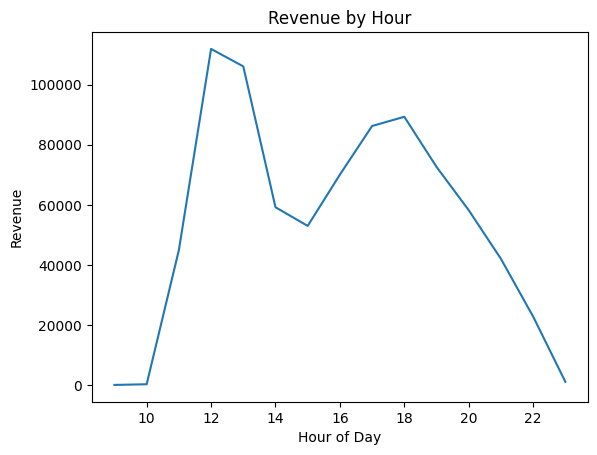

In [ ]:
plt.figure()
df.groupby("hour")["revenue"].sum().sort_index().plot(kind="line")
plt.title("Revenue by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.show()

### Insight
Identifies the busiest hours of operation.

## 7. What day of the week generates the most sales?

In [ ]:
sales_by_day = df.groupby("day_of_week")["revenue"].sum().sort_values(ascending=False)
sales_by_day

,revenue
day_of_week,
Friday,136073.90
Thursday,123528.50
Saturday,123182.40
Wednesday,114408.40
Tuesday,114133.80
Monday,107329.55
Sunday,99203.50


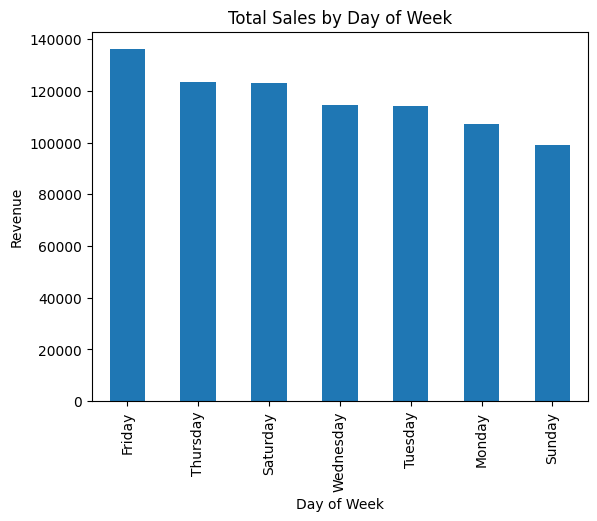

In [ ]:
plt.figure()
sales_by_day.plot(kind="bar")
plt.title("Total Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.show()

### Insight
Highlights weekly customer behavior patterns.

## 8. What are the top 5 bestselling pizzas?

In [ ]:
top_5 = df.groupby("name")["quantity"].sum().sort_values(ascending=False).head(5)
top_5

,quantity
name,
The Classic Deluxe Pizza,2453
The Barbecue Chicken Pizza,2432
The Hawaiian Pizza,2422
The Pepperoni Pizza,2418
The Thai Chicken Pizza,2371


### Insight
These pizzas drive the highest sales volume and should remain priority items.

## 9. What are the monthly sales trends?

In [ ]:
sales_by_month = df.groupby("month")["revenue"].sum()
sales_by_month

,revenue
month,
April,68736.80
August,68278.25
December,64701.15
February,65159.60
January,69793.30
July,72557.90
June,68230.20
March,70397.10
May,71402.75


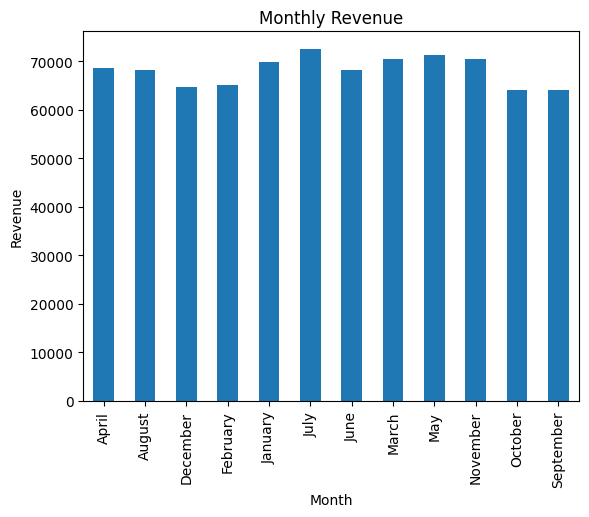

In [ ]:
plt.figure()
sales_by_month.plot(kind="bar")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

### Insight
Helps identify seasonal trends or demand fluctuations.

## 10. Which pizzas are underperforming?

In [ ]:
bottom_5 = df.groupby("name")["quantity"].sum().sort_values().head(5)
bottom_5

,quantity
name,
The Brie Carre Pizza,490
The Mediterranean Pizza,934
The Calabrese Pizza,937
The Spinach Supreme Pizza,950
The Soppressata Pizza,961


### Insight
Low-performing items may require promotions or menu adjustments.

# Conclusion

The analysis reveals strong yearly performance with consistent revenue generation.
Sales peak during lunch hours and Fridays show the highest weekly revenue.
A few pizza types dominate total sales, while some underperform and may require strategic adjustments.

Operational focus on peak hours and high-demand products could further optimize profitability.